In [14]:
#Data Cleaning

import pandas as pd
import numpy as np
import seaborn as sns


#Load the dataset

telecom = pd.read_excel("/users/sanghyunryu/desktop/Trainning/DataSetHandling/telecom_churn.xlsx")
print(telecom)


      GENDER_CD  EDUCATION_CD  OCCUPATION_CAT_CD  SUBS_TENURE  \
0             M           2.0                NaN          198   
1             M           1.0                NaN          114   
2             M           2.0               24.0          114   
3             M           1.0               87.0          228   
4             F           4.0               22.0          168   
...         ...           ...                ...          ...   
13191         F           3.0               79.0          114   
13192         M           NaN                NaN          120   
13193         M           1.0                NaN          132   
13194         F           3.0                NaN          156   
13195         M           1.0                NaN          132   

       OB_CALL_INTL_DUR_BASE_1  OB_CALL_INTL_DUR_BASE_2  \
0                         16.8                     16.3   
1                          2.9                      4.6   
2                          2.5            

In [2]:
#Check for missing values
print(telecom.isnull().any())

GENDER_CD                   True
EDUCATION_CD                True
OCCUPATION_CAT_CD           True
SUBS_TENURE                False
OB_CALL_INTL_DUR_BASE_1    False
                           ...  
TOT_REV_AMT                 True
TOT_PROF_AMT                True
CUST_ID                    False
name                       False
CHURN_FLG                  False
Length: 108, dtype: bool


In [3]:
telecom_missing = telecom.columns[telecom.isnull().any()]
print(telecom_missing)

Index(['GENDER_CD', 'EDUCATION_CD', 'OCCUPATION_CAT_CD', 'TOT_REV_AMT',
       'TOT_PROF_AMT'],
      dtype='object')


In [15]:
# Separate the columns
Missing_columns = telecom[['GENDER_CD','EDUCATION_CD', 'OCCUPATION_CAT_CD','TOT_REV_AMT', 'TOT_PROF_AMT' ]]
print(Missing_columns)

      GENDER_CD  EDUCATION_CD  OCCUPATION_CAT_CD  TOT_REV_AMT  TOT_PROF_AMT
0             M           2.0                NaN          NaN           NaN
1             M           1.0                NaN         99.0          99.0
2             M           2.0               24.0         47.0          47.0
3             M           1.0               87.0          NaN           NaN
4             F           4.0               22.0         97.0          97.0
...         ...           ...                ...          ...           ...
13191         F           3.0               79.0          NaN           NaN
13192         M           NaN                NaN          NaN           NaN
13193         M           1.0                NaN          7.0           7.0
13194         F           3.0                NaN          5.0           5.0
13195         M           1.0                NaN          NaN           NaN

[13196 rows x 5 columns]


In [16]:
# Check the average of column
print(Missing_columns.mean())
print(round(Missing_columns.mean()))

EDUCATION_CD          1.638757
OCCUPATION_CAT_CD    34.995394
TOT_REV_AMT          22.214628
TOT_PROF_AMT         22.214628
dtype: float64
EDUCATION_CD          2.0
OCCUPATION_CAT_CD    35.0
TOT_REV_AMT          22.0
TOT_PROF_AMT         22.0
dtype: float64


In [17]:
telecom_rep = Missing_columns.fillna(round(Missing_columns.mean()))
print(telecom_rep.isnull().any())

GENDER_CD             True
EDUCATION_CD         False
OCCUPATION_CAT_CD    False
TOT_REV_AMT          False
TOT_PROF_AMT         False
dtype: bool


In [18]:
telecom[['GENDER_CD','EDUCATION_CD', 'OCCUPATION_CAT_CD','TOT_REV_AMT', 'TOT_PROF_AMT']] = telecom_rep
print(telecom.isnull().any())

GENDER_CD                   True
EDUCATION_CD               False
OCCUPATION_CAT_CD          False
SUBS_TENURE                False
OB_CALL_INTL_DUR_BASE_1    False
                           ...  
TOT_REV_AMT                False
TOT_PROF_AMT               False
CUST_ID                    False
name                       False
CHURN_FLG                  False
Length: 108, dtype: bool


In [51]:
gender = telecom[['GENDER_CD']]
# print(gender)
# gender_rep = gender.fillna("unknown")
df_most_common_imputed = gender.apply(lambda x: x.fillna(x.value_counts().index[0]))
print(df_most_common_imputed.isnull().any())
print(df_most_common_imputed)

GENDER_CD    False
dtype: bool
      GENDER_CD
0             M
1             M
2             M
3             M
4             F
...         ...
13191         F
13192         M
13193         M
13194         F
13195         M

[13196 rows x 1 columns]


In [21]:
telecom[['GENDER_CD']] = gender_rep

In [22]:
print(telecom.isnull().any())
#cleaned all the missing values

GENDER_CD                  False
EDUCATION_CD               False
OCCUPATION_CAT_CD          False
SUBS_TENURE                False
OB_CALL_INTL_DUR_BASE_1    False
                           ...  
TOT_REV_AMT                False
TOT_PROF_AMT               False
CUST_ID                    False
name                       False
CHURN_FLG                  False
Length: 108, dtype: bool


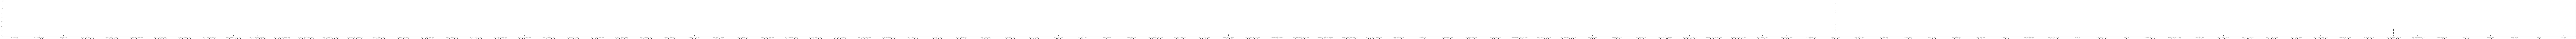

In [26]:
# OutLier Treatment
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
from scipy.stats import iqr
import numpy as np

# Boxplit to check outlier
plt.figure(figsize=(500,7))
sns.boxplot(data=telecom)
plt.show()

In [ ]:
#AVG_OB_CALL_CNT, TOT_IB_CALL_CNT, TOT_OB_CALL_LOC_CNT, TOT_OB_CALL_CNT, RATIO_SPEC_SMS_SMS_REV_AMT to fix

Iqr: 802.25
LW: -796.375
UW: 2412.625


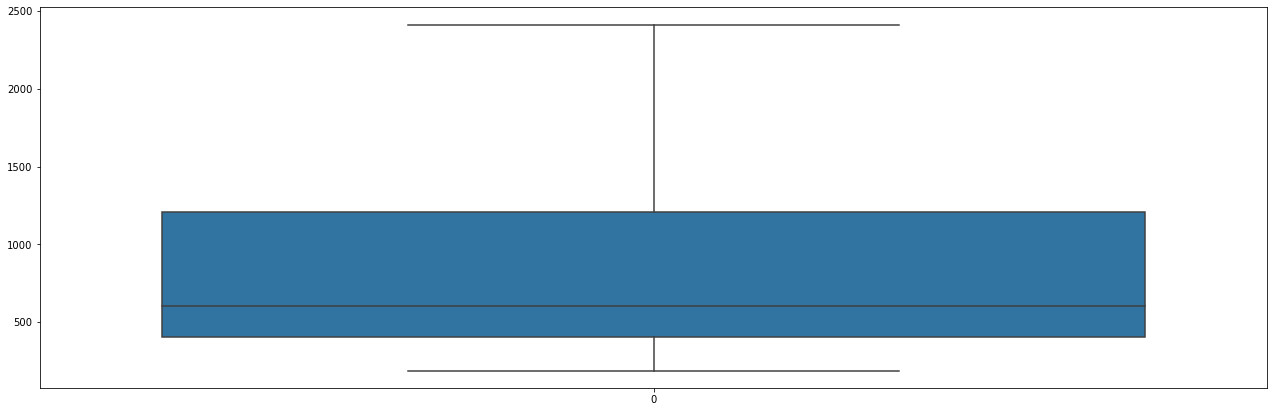

In [27]:
#AVG_OB_CALL_CNT
q1 = telecom["AVG_OB_CALL_CNT"].quantile(.25)
q3 = telecom["AVG_OB_CALL_CNT"].quantile(.75)

print("Iqr:", q3-q1)
Lower_Whisker = q1 - (q3 - q1) * 1.5
print("LW:",Lower_Whisker )

Upper_Whisker = q3 + (q3 - q1) * 1.5
print("UW:",Upper_Whisker )
telecom["AVG_OB_CALL_CNT"] = np.where(telecom["AVG_OB_CALL_CNT"] < Lower_Whisker, Lower_Whisker, telecom["AVG_OB_CALL_CNT"])
telecom["AVG_OB_CALL_CNT"] = np.where(telecom["AVG_OB_CALL_CNT"] > Upper_Whisker, Upper_Whisker, telecom["AVG_OB_CALL_CNT"])

#check the outlier for RevolvingUtilizationOfUnsecuredLines
plt.figure(figsize=(22, 7))
sns.boxplot(data=telecom["AVG_OB_CALL_CNT"])
plt.show()

Iqr: 246.25
LW: -249.625
UW: 735.375


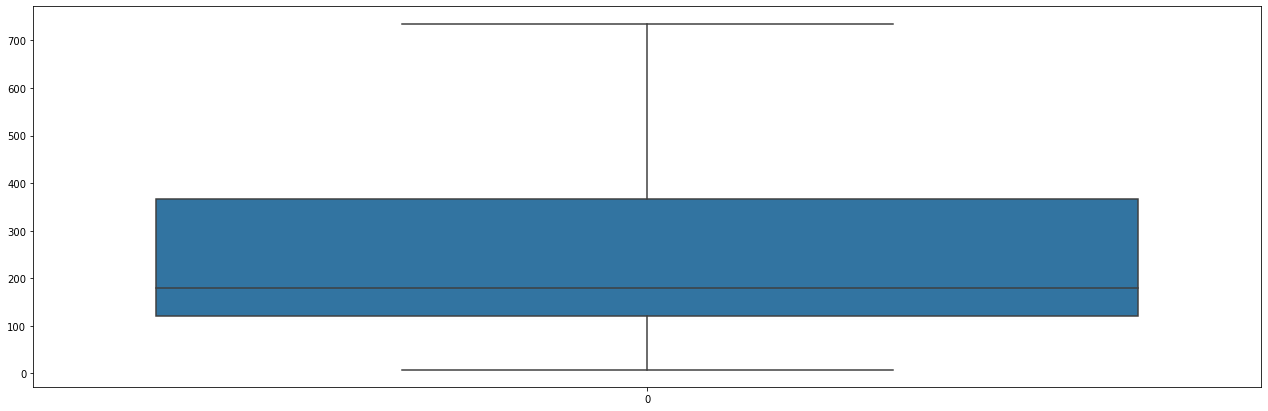

In [42]:
#TOT_IB_CALL_CNT
q1 = telecom["TOT_IB_CALL_CNT"].quantile(.25)
q3 = telecom["TOT_IB_CALL_CNT"].quantile(.75)

print("Iqr:", q3-q1)
Lower_Whisker = q1 - (q3 - q1) * 1.5
print("LW:",Lower_Whisker )

Upper_Whisker = q3 + (q3 - q1) * 1.5
print("UW:",Upper_Whisker )
telecom["TOT_IB_CALL_CNT"] = np.where(telecom["TOT_IB_CALL_CNT"] < Lower_Whisker, Lower_Whisker, telecom["TOT_IB_CALL_CNT"])
telecom["TOT_IB_CALL_CNT"] = np.where(telecom["TOT_IB_CALL_CNT"] > Upper_Whisker, Upper_Whisker, telecom["TOT_IB_CALL_CNT"])

#check the outlier for RevolvingUtilizationOfUnsecuredLines
plt.figure(figsize=(22, 7))
sns.boxplot(data=telecom["TOT_IB_CALL_CNT"])
plt.show()


Iqr: 480.25
LW: -475.375
UW: 1445.625


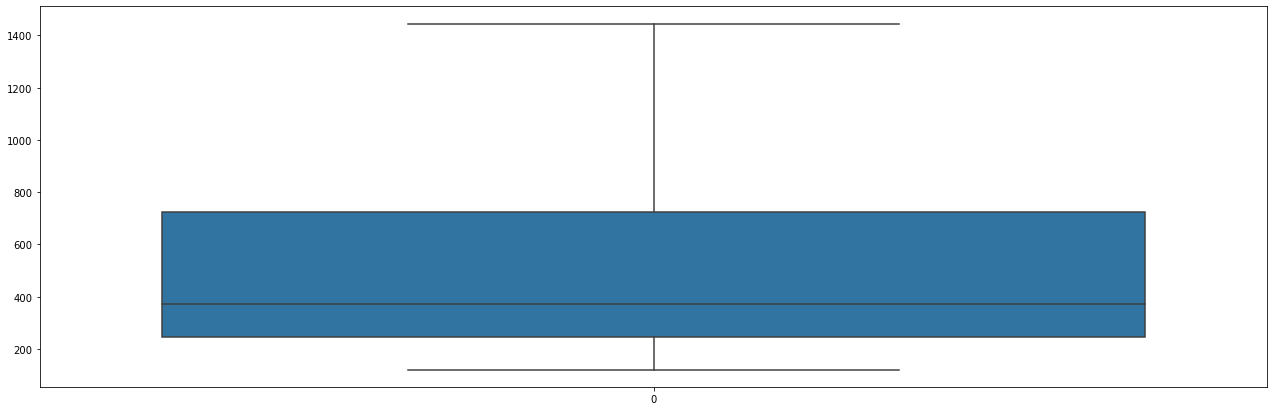

In [28]:
#TOT_OB_CALL_LOC_CNT
q1 = telecom["TOT_OB_CALL_LOC_CNT"].quantile(.25)
q3 = telecom["TOT_OB_CALL_LOC_CNT"].quantile(.75)

print("Iqr:", q3-q1)
Lower_Whisker = q1 - (q3 - q1) * 1.5
print("LW:",Lower_Whisker )

Upper_Whisker = q3 + (q3 - q1) * 1.5
print("UW:",Upper_Whisker )
telecom["TOT_OB_CALL_LOC_CNT"] = np.where(telecom["TOT_OB_CALL_LOC_CNT"] < Lower_Whisker, Lower_Whisker, telecom["TOT_OB_CALL_LOC_CNT"])
telecom["TOT_OB_CALL_LOC_CNT"] = np.where(telecom["TOT_OB_CALL_LOC_CNT"] > Upper_Whisker, Upper_Whisker, telecom["TOT_OB_CALL_LOC_CNT"])

#check the outlier for RevolvingUtilizationOfUnsecuredLines
plt.figure(figsize=(22, 7))
sns.boxplot(data=telecom["TOT_OB_CALL_LOC_CNT"])
plt.show()

Iqr: 4813.5
LW: -4778.25
UW: 14475.75


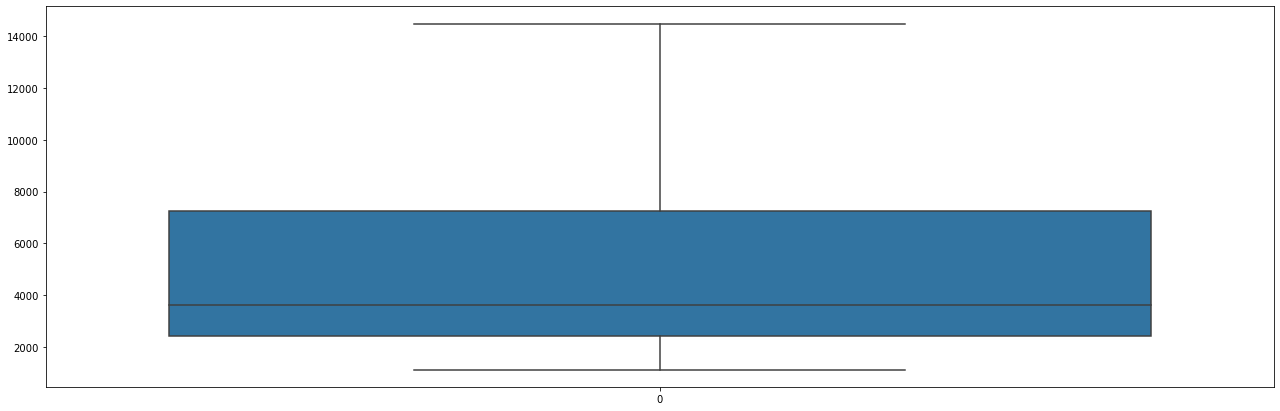

In [36]:
#TOT_OB_CALL_CNT
q1 = telecom["TOT_OB_CALL_CNT"].quantile(.25)
q3 = telecom["TOT_OB_CALL_CNT"].quantile(.75)

print("Iqr:", q3-q1)
Lower_Whisker = q1 - (q3 - q1) * 1.5
print("LW:",Lower_Whisker )

Upper_Whisker = q3 + (q3 - q1) * 1.5
print("UW:",Upper_Whisker )
telecom["TOT_OB_CALL_CNT"] = np.where(telecom["TOT_OB_CALL_CNT"] < Lower_Whisker, Lower_Whisker, telecom["TOT_OB_CALL_CNT"])
telecom["TOT_OB_CALL_CNT"] = np.where(telecom["TOT_OB_CALL_CNT"] > Upper_Whisker, Upper_Whisker, telecom["TOT_OB_CALL_CNT"])

#check the outlier for RevolvingUtilizationOfUnsecuredLines
plt.figure(figsize=(22, 7))
sns.boxplot(data=telecom["TOT_OB_CALL_CNT"])
plt.show()

Iqr: 0.0
LW: 0.0
UW: 0.0


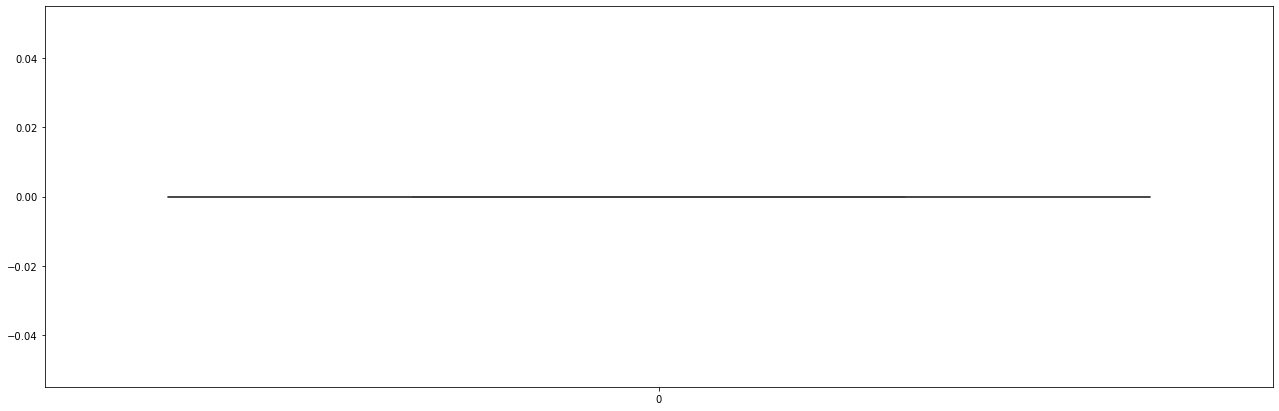

In [30]:
#RATIO_SPEC_SMS_SMS_REV_AMT
q1 = telecom["RATIO_SPEC_SMS_SMS_REV_AMT"].quantile(.25)
q3 = telecom["RATIO_SPEC_SMS_SMS_REV_AMT"].quantile(.75)

print("Iqr:", q3-q1)
Lower_Whisker = q1 - (q3 - q1) * 1.5
print("LW:",Lower_Whisker )

Upper_Whisker = q3 + (q3 - q1) * 1.5
print("UW:",Upper_Whisker )
telecom["RATIO_SPEC_SMS_SMS_REV_AMT"] = np.where(telecom["RATIO_SPEC_SMS_SMS_REV_AMT"] < Lower_Whisker, Lower_Whisker, telecom["RATIO_SPEC_SMS_SMS_REV_AMT"])
telecom["RATIO_SPEC_SMS_SMS_REV_AMT"] = np.where(telecom["RATIO_SPEC_SMS_SMS_REV_AMT"] > Upper_Whisker, Upper_Whisker, telecom["RATIO_SPEC_SMS_SMS_REV_AMT"])

#check the outlier for RevolvingUtilizationOfUnsecuredLines
plt.figure(figsize=(22, 7))
sns.boxplot(data=telecom["RATIO_SPEC_SMS_SMS_REV_AMT"])
plt.show()

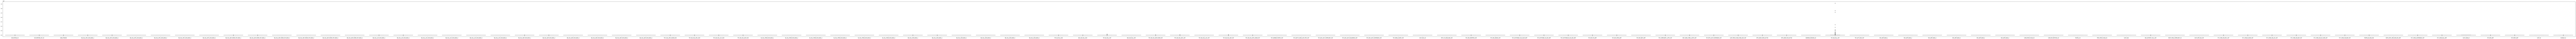

In [32]:
plt.figure(figsize=(500,7))
sns.boxplot(data=telecom)
plt.show()

In [39]:
#TOT_OB_CALL_NAT_ROAM_CNT, TOT_OB_CALL_INTL_CNT, TOT_OB_CALL_NAT_CNT to fix 

Iqr: 41.0
LW: -40.5
UW: 123.5


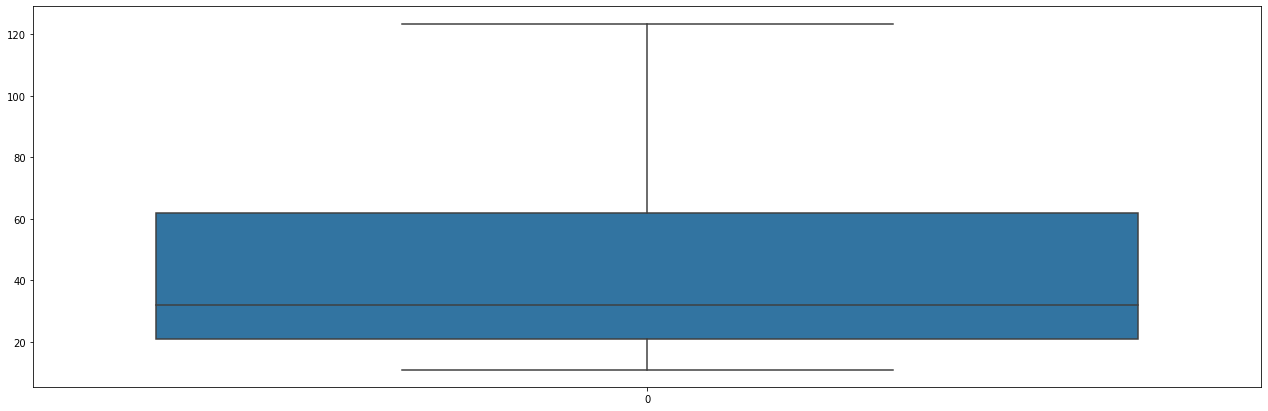

In [33]:
#TOT_OB_CALL_NAT_ROAM_CNT
q1 = telecom["TOT_OB_CALL_NAT_ROAM_CNT"].quantile(.25)
q3 = telecom["TOT_OB_CALL_NAT_ROAM_CNT"].quantile(.75)

print("Iqr:", q3-q1)
Lower_Whisker = q1 - (q3 - q1) * 1.5
print("LW:",Lower_Whisker )

Upper_Whisker = q3 + (q3 - q1) * 1.5
print("UW:",Upper_Whisker )
telecom["TOT_OB_CALL_NAT_ROAM_CNT"] = np.where(telecom["TOT_OB_CALL_NAT_ROAM_CNT"] < Lower_Whisker, Lower_Whisker, telecom["TOT_OB_CALL_NAT_ROAM_CNT"])
telecom["TOT_OB_CALL_NAT_ROAM_CNT"] = np.where(telecom["TOT_OB_CALL_NAT_ROAM_CNT"] > Upper_Whisker, Upper_Whisker, telecom["TOT_OB_CALL_NAT_ROAM_CNT"])

#check the outlier for RevolvingUtilizationOfUnsecuredLines
plt.figure(figsize=(22, 7))
sns.boxplot(data=telecom["TOT_OB_CALL_NAT_ROAM_CNT"])
plt.show()

Iqr: 41.0
LW: -40.5
UW: 123.5


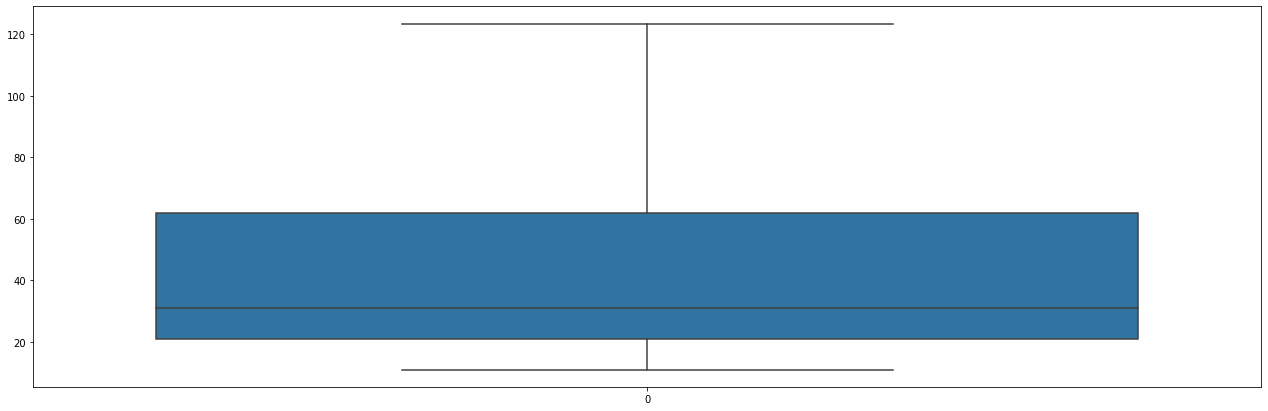

In [41]:
#TOT_OB_CALL_INTL_CNT
q1 = credit["TOT_OB_CALL_INTL_CNT"].quantile(.25)
q3 = credit["TOT_OB_CALL_INTL_CNT"].quantile(.75)

print("Iqr:", q3-q1)
Lower_Whisker = q1 - (q3 - q1) * 1.5
print("LW:",Lower_Whisker )

Upper_Whisker = q3 + (q3 - q1) * 1.5
print("UW:",Upper_Whisker )
credit["TOT_OB_CALL_INTL_CNT"] = np.where(telecom["TOT_OB_CALL_INTL_CNT"] < Lower_Whisker, Lower_Whisker, credit["TOT_OB_CALL_INTL_CNT"])
credit["TOT_OB_CALL_INTL_CNT"] = np.where(credit["TOT_OB_CALL_INTL_CNT"] > Upper_Whisker, Upper_Whisker, credit["TOT_OB_CALL_INTL_CNT"])

#check the outlier for RevolvingUtilizationOfUnsecuredLines
plt.figure(figsize=(22, 7))
sns.boxplot(data=credit["TOT_OB_CALL_INTL_CNT"])
plt.show()

Iqr: 205.0
LW: -204.5
UW: 615.5


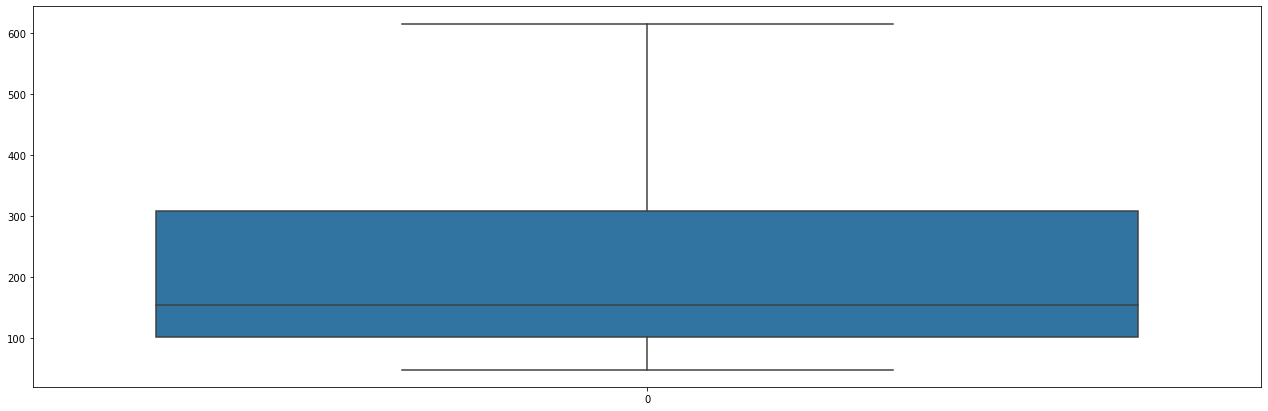

In [34]:
#TOT_OB_CALL_INTL_CNT
q1 = telecom["TOT_OB_CALL_NAT_CNT"].quantile(.25)
q3 = telecom["TOT_OB_CALL_NAT_CNT"].quantile(.75)

print("Iqr:", q3-q1)
Lower_Whisker = q1 - (q3 - q1) * 1.5
print("LW:",Lower_Whisker )

Upper_Whisker = q3 + (q3 - q1) * 1.5
print("UW:",Upper_Whisker )
telecom["TOT_OB_CALL_NAT_CNT"] = np.where(telecom["TOT_OB_CALL_NAT_CNT"] < Lower_Whisker, Lower_Whisker, telecom["TOT_OB_CALL_NAT_CNT"])
telecom["TOT_OB_CALL_NAT_CNT"] = np.where(telecom["TOT_OB_CALL_NAT_CNT"] > Upper_Whisker, Upper_Whisker, telecom["TOT_OB_CALL_NAT_CNT"])

#check the outlier for RevolvingUtilizationOfUnsecuredLines
plt.figure(figsize=(22, 7))
sns.boxplot(data=telecom["TOT_OB_CALL_NAT_CNT"])
plt.show()

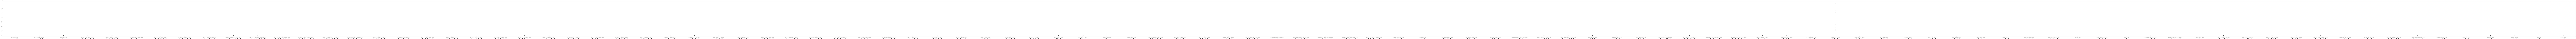

In [36]:
plt.figure(figsize=(500,7))
sns.boxplot(data=telecom)
plt.show()

In [ ]:
 #TOT_OUTSTAND_30_60_DAY_AMT, TOT_OUTSTAND_30_DAY_AMT, TOT_OUTSTAND_60_90_DAY_AMT, TOT_REV_FIX_AMT, TOT_REV_GPRS_AMT, PCT_CHNG_SUSPENDED_CNT




Iqr: 4813.5
LW: -4778.25
UW: 14475.75


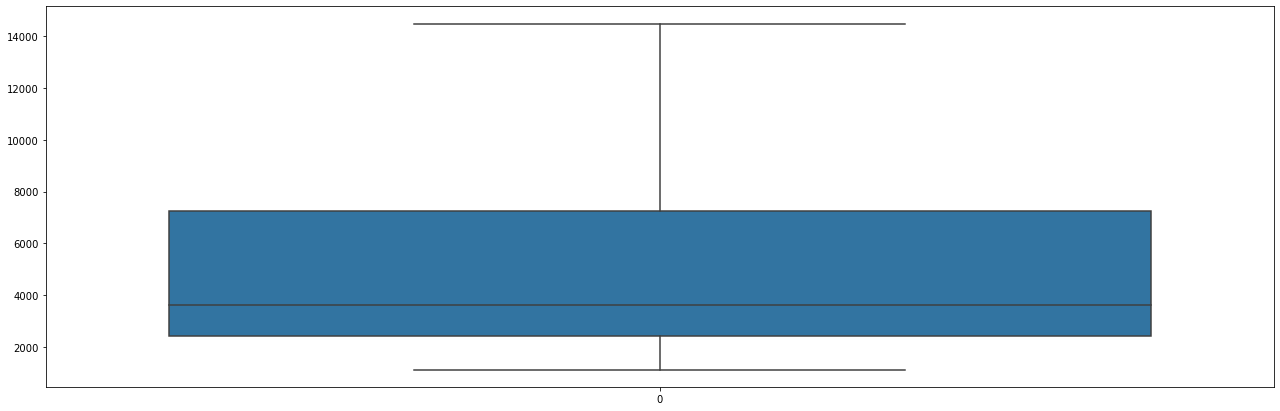

In [37]:
#TOT_OB_CALL_CNT
q1 = telecom["TOT_OB_CALL_CNT"].quantile(.25)
q3 = telecom["TOT_OB_CALL_CNT"].quantile(.75)

print("Iqr:", q3-q1)
Lower_Whisker = q1 - (q3 - q1) * 1.5
print("LW:",Lower_Whisker )

Upper_Whisker = q3 + (q3 - q1) * 1.5
print("UW:",Upper_Whisker )
telecom["TOT_OB_CALL_CNT"] = np.where(telecom["TOT_OB_CALL_CNT"] < Lower_Whisker, Lower_Whisker, telecom["TOT_OB_CALL_CNT"])
telecom["TOT_OB_CALL_CNT"] = np.where(telecom["TOT_OB_CALL_CNT"] > Upper_Whisker, Upper_Whisker, telecom["TOT_OB_CALL_CNT"])

#check the outlier for RevolvingUtilizationOfUnsecuredLines
plt.figure(figsize=(22, 7))
sns.boxplot(data=telecom["TOT_OB_CALL_CNT"])
plt.show()

Iqr: 0.0
LW: 0.0
UW: 0.0


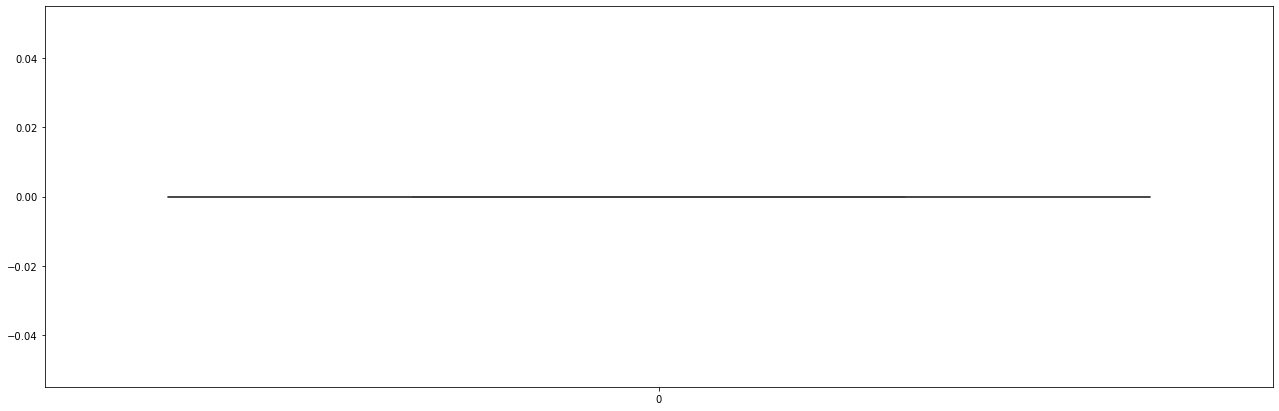

In [39]:
#TOT_OUTSTAND_30_60_DAY_AMT
q1 = telecom["TOT_OUTSTAND_30_60_DAY_AMT"].quantile(.25)
q3 = telecom["TOT_OUTSTAND_30_60_DAY_AMT"].quantile(.75)

print("Iqr:", q3-q1)
Lower_Whisker = q1 - (q3 - q1) * 1.5
print("LW:",Lower_Whisker )

Upper_Whisker = q3 + (q3 - q1) * 1.5
print("UW:",Upper_Whisker )
telecom["TOT_OUTSTAND_30_60_DAY_AMT"] = np.where(telecom["TOT_OUTSTAND_30_60_DAY_AMT"] < Lower_Whisker, Lower_Whisker, telecom["TOT_OUTSTAND_30_60_DAY_AMT"])
telecom["TOT_OUTSTAND_30_60_DAY_AMT"] = np.where(telecom["TOT_OUTSTAND_30_60_DAY_AMT"] > Upper_Whisker, Upper_Whisker, telecom["TOT_OUTSTAND_30_60_DAY_AMT"])

#check the outlier for RevolvingUtilizationOfUnsecuredLines
plt.figure(figsize=(22, 7))
sns.boxplot(data=telecom["TOT_OUTSTAND_30_60_DAY_AMT"])
plt.show()

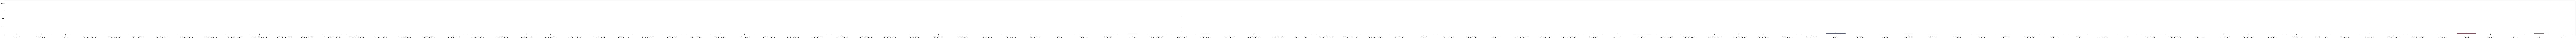

In [43]:
plt.figure(figsize=(500,7))
sns.boxplot(data=telecom)
plt.show()

Iqr: 41.0
LW: -40.5
UW: 123.5


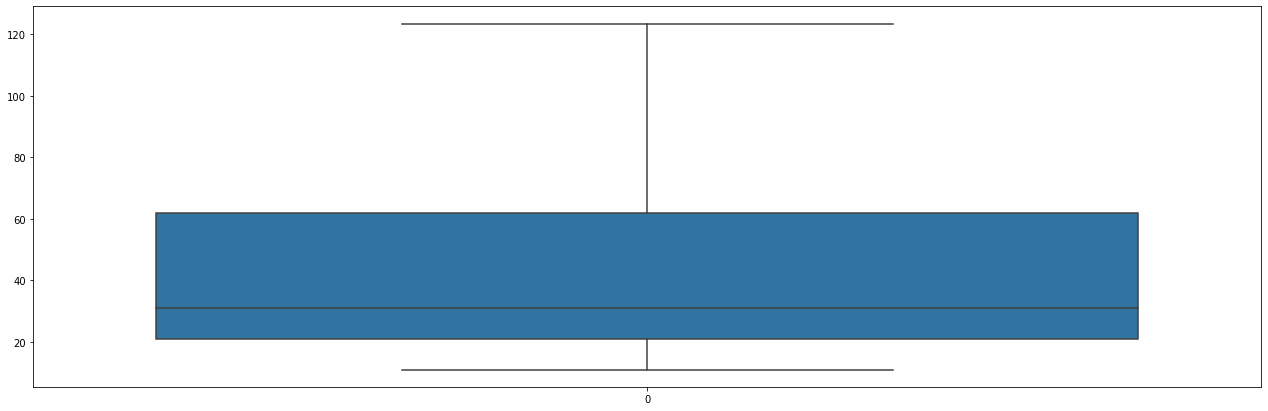

In [44]:

q1 = telecom["TOT_OB_CALL_INTL_CNT"].quantile(.25)
q3 = telecom["TOT_OB_CALL_INTL_CNT"].quantile(.75)

print("Iqr:", q3-q1)
Lower_Whisker = q1 - (q3 - q1) * 1.5
print("LW:",Lower_Whisker )

Upper_Whisker = q3 + (q3 - q1) * 1.5
print("UW:",Upper_Whisker )
telecom["TOT_OB_CALL_INTL_CNT"] = np.where(telecom["TOT_OB_CALL_INTL_CNT"] < Lower_Whisker, Lower_Whisker, telecom["TOT_OB_CALL_INTL_CNT"])
telecom["TOT_OB_CALL_INTL_CNT"] = np.where(telecom["TOT_OB_CALL_INTL_CNT"] > Upper_Whisker, Upper_Whisker, telecom["TOT_OB_CALL_INTL_CNT"])

#check the outlier for RevolvingUtilizationOfUnsecuredLines
plt.figure(figsize=(22, 7))
sns.boxplot(data=telecom["TOT_OB_CALL_INTL_CNT"])
plt.show()

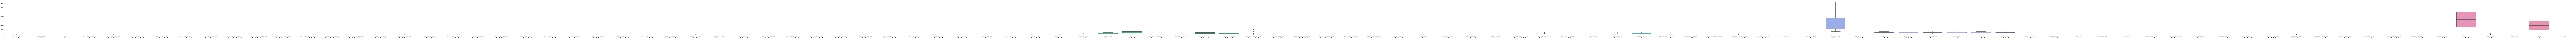

In [45]:
plt.figure(figsize=(500,7))
sns.boxplot(data=telecom)
plt.show()

Iqr: 0.7094409907500001
LW: -0.8707085148750002
UW: 1.9670554481250002


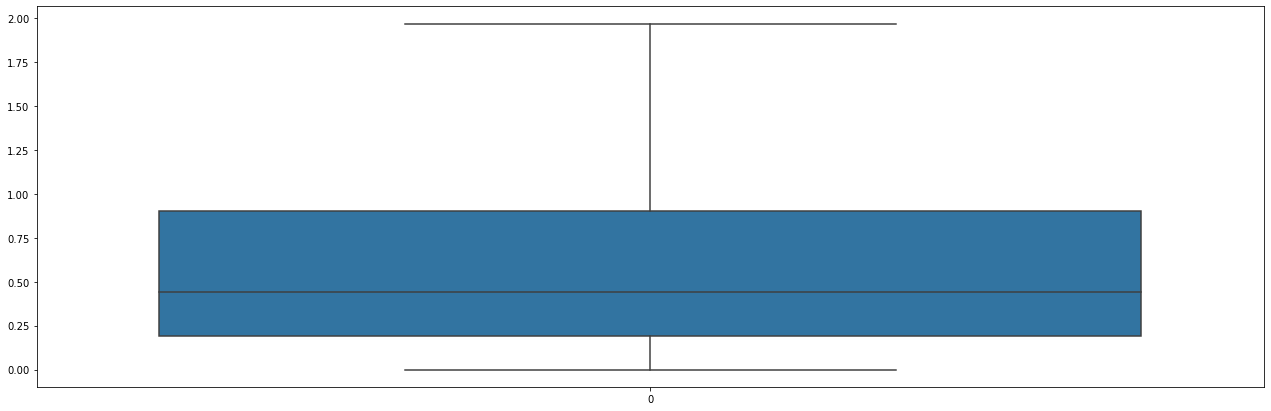

In [46]:

q1 = telecom["TOT_OB_CALL_INTL_ROAM_CNT"].quantile(.25)
q3 = telecom["TOT_OB_CALL_INTL_ROAM_CNT"].quantile(.75)

print("Iqr:", q3-q1)
Lower_Whisker = q1 - (q3 - q1) * 1.5
print("LW:",Lower_Whisker )

Upper_Whisker = q3 + (q3 - q1) * 1.5
print("UW:",Upper_Whisker )
telecom["TOT_OB_CALL_INTL_ROAM_CNT"] = np.where(telecom["TOT_OB_CALL_INTL_ROAM_CNT"] < Lower_Whisker, Lower_Whisker, telecom["TOT_OB_CALL_INTL_ROAM_CNT"])
telecom["TOT_OB_CALL_INTL_ROAM_CNT"] = np.where(telecom["TOT_OB_CALL_INTL_ROAM_CNT"] > Upper_Whisker, Upper_Whisker, telecom["TOT_OB_CALL_INTL_ROAM_CNT"])

#check the outlier for RevolvingUtilizationOfUnsecuredLines
plt.figure(figsize=(22, 7))
sns.boxplot(data=telecom["TOT_OB_CALL_INTL_ROAM_CNT"])
plt.show()

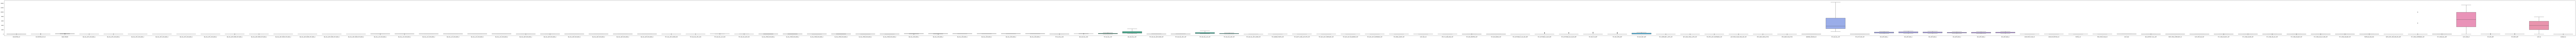

In [48]:
plt.figure(figsize=(500,7))
sns.boxplot(data=telecom)
plt.show()